# Model Evaluation

In [1]:
import pandas as pd
import numpy as np

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.text import tokenizer_from_json

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

import h5py
import io
import json
import time

import matplotlib.pyplot as plt
import seaborn as sns

### Define Parameters

In [2]:
# Model Paramaters (Should be the same when training the model)
vocab_size = 8000
embedding_dim = 32
max_length = 40
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

### Load Data

In [3]:
data = pd.read_csv("./ProcessedData.csv")

data = data.drop(columns=["Unnamed: 0"])
X = list(data.tweet) # X => Sentence
Y = list(data.label) # Y => Sentiment

In [4]:
# 0 -> Negative, 1 -> Positive
Y = [1 if i!=0 else i for i in Y]

### Load Model

In [6]:
# Load Model
model = tf.keras.models.load_model('SentimentModel.h5')

In [7]:
# Load Tokenizer
with open('tokenizer.json') as f:
    data = json.load(f)
    tokenizer = tokenizer_from_json(data)

### Get Model Predictions

In [8]:
def predictSentiment(x):
    sequences = tokenizer.texts_to_sequences(x)
    padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
    return model.predict(padded)

In [9]:
Y_Pred = predictSentiment(X)

In [10]:
# Format Y_Pred from score (0 to 1) to category ("POSITIVE" or "NEGATIVE")
# 0 -> Negative, 1 -> Positive
Y_Pred = ["POSITIVE" if i > 0.5 else "NEGATIVE" for i in Y_Pred]

In [11]:
# Change numbers to labels
Y = ["POSITIVE" if i == 1 else "NEGATIVE" for i in Y]

### Confusion Matrix

In [12]:
# Making a Confusion Matrix
conMat = confusion_matrix(Y, Y_Pred)

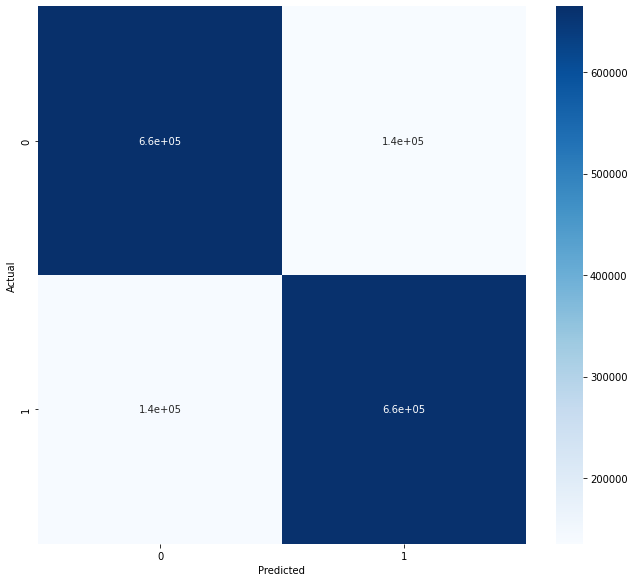

In [13]:
# Visualize Confusion Matrix
figure = plt.figure(figsize=(9, 8))
sns.heatmap(conMat, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

### Model Report

In [14]:
print(classification_report(y_true = Y, y_pred = Y_Pred))

              precision    recall  f1-score   support

    NEGATIVE       0.83      0.83      0.83    800000
    POSITIVE       0.83      0.83      0.83    800000

    accuracy                           0.83   1600000
   macro avg       0.83      0.83      0.83   1600000
weighted avg       0.83      0.83      0.83   1600000



In [15]:
conMat

array([[664771, 135229],
       [137813, 662187]], dtype=int64)